In [5]:
import pandas as pd

data = pd.read_csv('../classification/datasets/hr.csv')
# using data.copy() to create a new DataFrame, keeping the original data intact
df = pd.DataFrame(data)
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [9]:
# Section 1.2: Dataset Description - Exploring the dataset
# gaining some insights into the data especially the data types of the columns
# Metadata
print(f"Shape of dataset: {df.shape}")
print("Columns in the dataset:")
print(df.info())

Shape of dataset: (311, 36)
Columns in the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null

In [3]:
# Section 1: Dataset Description - Exploring the dataset
# Here, we start to gain some insights about the data especially the data types of the columns and metadata.
print(f"Shape of dataset: {df.shape}\n")
print("Columns in the dataset: \n")
print(df.info())

Shape of dataset: (311, 36)

Columns in the dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-n

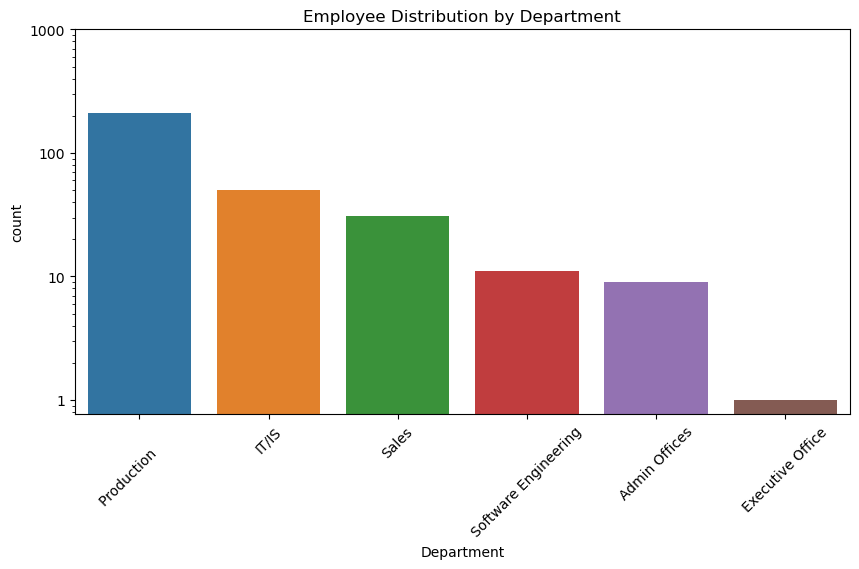

In [10]:
# Section 2: Visualizations

# Now, we familiarize the readers with the dataset through some informative statistics and charts.
import matplotlib.pyplot as plt
import seaborn as sns

# Employee distribution by department
plt.figure(figsize=(10, 5))
sns.countplot(x='Department', data=df, order=df['Department'].value_counts().index)
plt.yscale('log') # Thanks to logarithmic scale, we can see the distribution of employees clearer even in the departments with fewer employees
log_ticks = [1, 10, 100, 1000]
plt.yticks(log_ticks, [str(tick) for tick in log_ticks])  # Showing count values as integers

plt.title('Employee Distribution by Department')
plt.xticks(rotation=45)
plt.show()

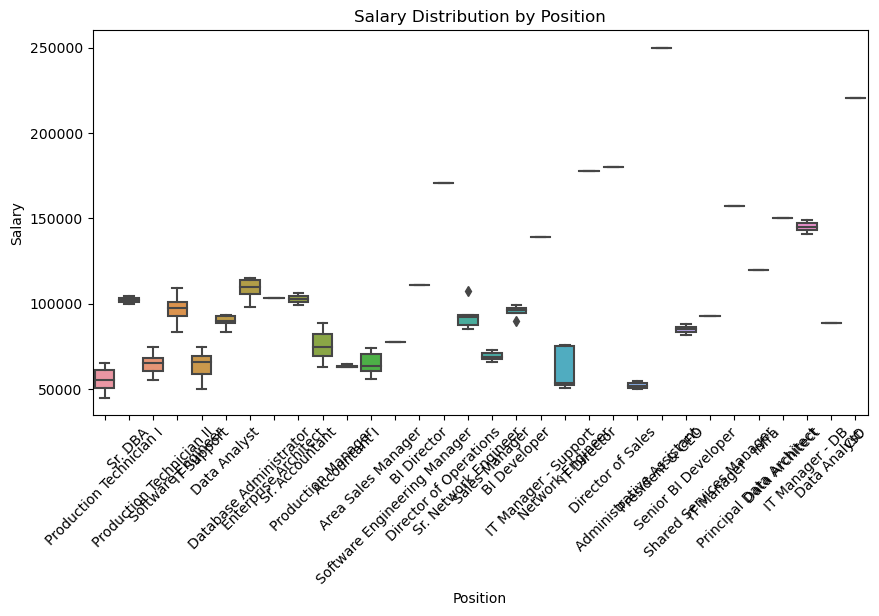

In [11]:
# Average salary by position
plt.figure(figsize=(10, 5))
sns.boxplot(x='Position', y='Salary', data=df)
plt.title('Salary Distribution by Position')
plt.xticks(rotation=45)
plt.show()

# boxplot or what
# cok pozisyon var cozum
# Option 1: Group Less Frequent Positions as "Other"
# Option 2: Focus on Top N Positions
# Option 3: Aggregate by Position and Show Average Salaries

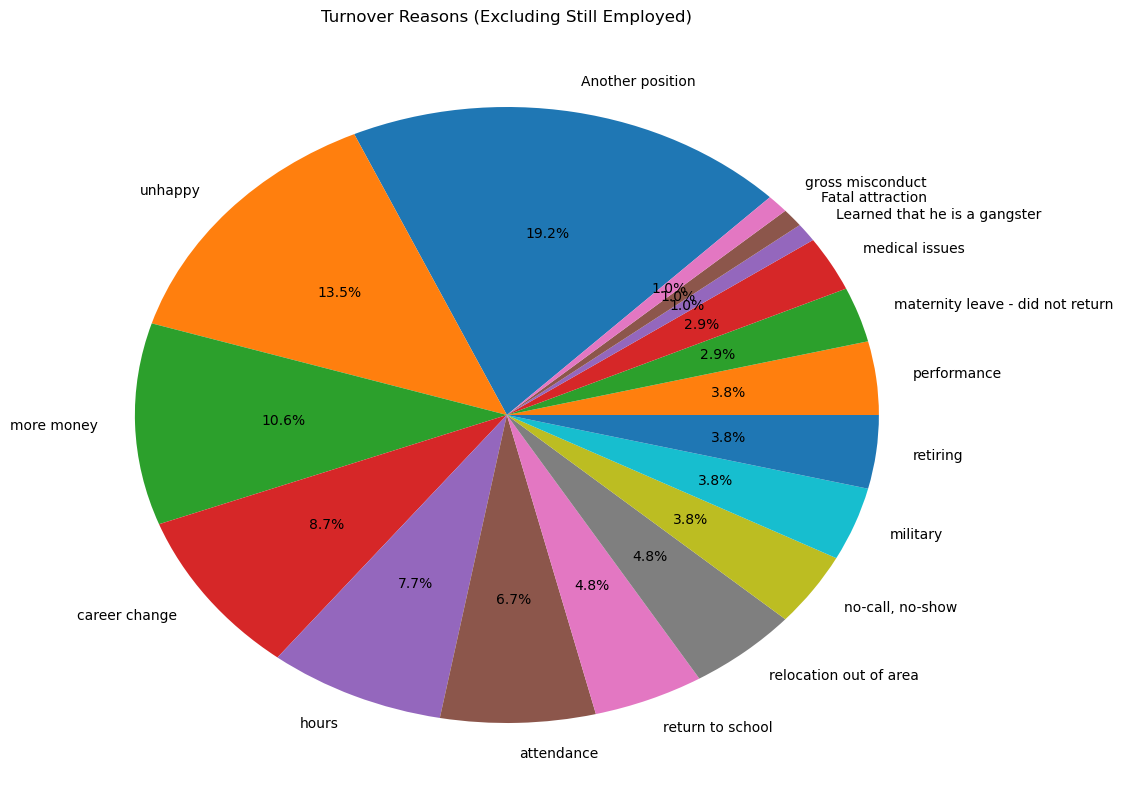

In [13]:
# Turnover reasons distribution

# Excluding "Still Employed" from the TermReason column for clearer visualization
turnover_reasons = df['TermReason'].value_counts()
turnover_reasons = turnover_reasons[turnover_reasons.index != 'N/A-StillEmployed']

plt.figure(figsize=(12, 10))
ax = turnover_reasons.plot.pie(autopct='%1.1f%%', startangle=45,)
ax.set_aspect('auto')
plt.title('Turnover Reasons (Excluding Still Employed)')
plt.ylabel('')
plt.show()

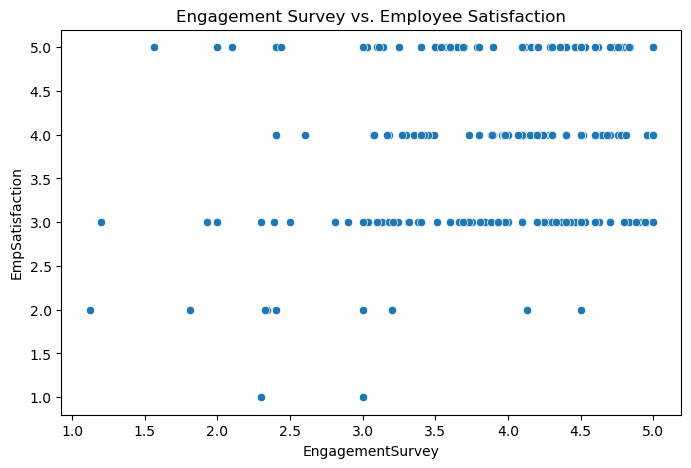

In [14]:
# Scatter plot: EngagementSurvey vs. EmpSatisfaction
plt.figure(figsize=(8, 5))
sns.scatterplot(x='EngagementSurvey', y='EmpSatisfaction', data=df)
plt.title('Engagement Survey vs. Employee Satisfaction')
plt.show()

In [15]:
# Section 3: Data Preprocessing
# Data Cleaning

# as a first step, we're starting to clean the data by checking the missing values per column:
print("Missing values per column:")
print(df.isnull().sum())

# Now, getting rid of the ID related columns which are not useful for the model.
id_columns = [col for col in df.columns if col.endswith('ID')]
df_cleaned = df.drop(columns=id_columns)

# handling missing values
df_cleaned.fillna(0, inplace=True)

print("Remaining columns after dropping ID-related columns:")
print(df_cleaned.columns)

Missing values per column:
Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource    

In [17]:
# --- Data Transformation ---
from sklearn.preprocessing import LabelEncoder

# Encoding the categorical columns:
# hispanic latino, race desc, term reason, empl status, department ----> ?????? why not
# one hot encodin yap ya da direkt
# df_encoded = pd.get_dummies(df, columns=categorical_columns)
categorical_columns = ['Department', 'Position', 'TermReason', 'PerformanceScore', 'RecruitmentSource', 'Sex', 'MaritalDesc', 'CitizenDesc']
label_encoders = {col: LabelEncoder() for col in categorical_columns}

for col in categorical_columns:
    df_cleaned[col] = label_encoders[col].fit_transform(df_cleaned[col])


# normalize numerical features belki
from sklearn.preprocessing import StandardScaler

numerical_columns = ['Salary', 'Absences', 'EngagementSurvey', 'EmpSatisfaction']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [18]:
# --- Data Reduction ---
# Keep only numeric columns for correlation analysis
numeric_df = df_cleaned.select_dtypes(include=['number'])

# Check for correlation
correlation_matrix = numeric_df.corr()

# Display correlations with the 'Termd' column, assuming it's the target variable
print(correlation_matrix['Termd'].sort_values(ascending=False))

Termd                   1.000000
TermReason              0.613564
DaysLateLast30          0.136379
Position                0.130821
PerformanceScore        0.112317
Absences                0.098274
Department              0.047477
EmpSatisfaction        -0.004732
Sex                    -0.015741
EngagementSurvey       -0.017543
CitizenDesc            -0.062140
Salary                 -0.093994
Zip                    -0.139006
MaritalDesc            -0.146238
SpecialProjectsCount   -0.147429
RecruitmentSource      -0.200198
Name: Termd, dtype: float64


In [21]:
# Section 4: Machine Learning in Action
# 4.1. Selected Algorithms
# Introduce the selected algorithms

In [23]:
# 4.2. Performance Measurement
# Describe the process with the definitions of the metrics employed.
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score

In [25]:
# 4.3 Experiments
# Describe the experiments that ensure an optimal performance
#X = df_encoded.drop()
#y = df_encoded[]

In [26]:
# 4.4. Results

#Share the key results without discussing them. This section should be based on facts.

In [20]:
#5 -  INSIGHT
# Interpret the results and formulate actionable insights. Be specific and to-the-point. The insights should be extracted from the results.